Put this in bluenose.
Before running, download the PyTPG directory into the same directory as this notebook.
on bluenose, run the following:

!pip install numpy
!pip install -e
!pip install bitarray
!pip install matplotlib
!pip install gym


In [13]:
#Run this block to make sure you have the dependancies installed
#Anything that doesn't work can usually be resolved using pip
import tpg
import numpy as np
import matplotlib.pyplot as plt
import gym
import gym.spaces
from gym import wrappers
from tpg.tpg_trainer import TpgTrainer
from tpg.tpg_agent import TpgAgent
import time
from IPython import display
from scipy import misc


In [14]:
#functions for rendering over Jupyter as used in Ryan Ameral's example
def show_state(env, step=0, name='', info=''):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (name, step, info))
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
#uses only red instead of RGB
def getState(state):
    state2 = []
    for x in state:
        for y in x:
            state2.append(y[0])
            
    return state2
#NOTE: I never use this function. I use preprocess() instead

In [23]:
#build openAI gym environment and print the size of the action space
env = gym.make('Breakout-v4')
#wrap the env object so that we can save video of the learning process :)
#note that this will end up saving to the directory which the code is saved in
env = wrappers.Monitor(env, './videos/breakout-experiment-1')
print(env.action_space)

Discrete(4)


**The follwing is the most basic implementation. 
It a basic generational selection procedure for the Breakout game based on visual input.
As is common practice in computer vision, RGB images have been downsized to one channel.

*WARNING!!!!!!
**THIS BLOCK OF CODE WILL TAKE !HOURS! TO RUN!!!!!!!!!!!

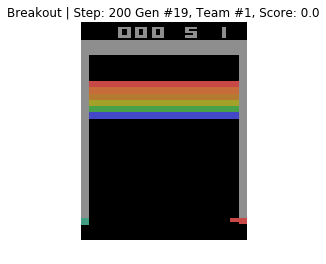

Time Taken (Seconds): 21084.513924360275
Results:
Min, Max, Avg
0.0 2.0 0.26
0.0 2.0 0.34782608695652173
0.0 3.0 0.5416666666666666
0.0 3.0 0.5909090909090909
0.0 3.0 0.8536585365853658
0.0 3.0 0.8780487804878049
0.0 4.0 1.0681818181818181
0.0 4.0 1.0930232558139534
0.0 4.0 1.2222222222222223
0.0 4.0 1.1891891891891893
0.0 4.0 1.146341463414634
0.0 3.0 1.1904761904761905
0.0 3.0 1.2142857142857142
0.0 4.0 1.186046511627907
0.0 4.0 1.1904761904761905
0.0 4.0 1.1904761904761905
0.0 3.0 1.325
0.0 4.0 1.1081081081081081
0.0 4.0 1.3333333333333333
0.0 4.0 1.025


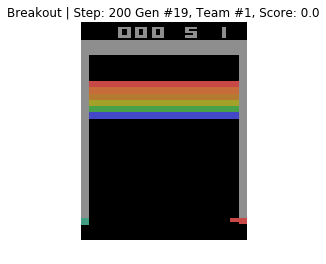

In [4]:
%matplotlib inline

#used to track time
tStart = time.time()

# first create an instance of the TpgTrainer
# this creates the whole population and everything
trainer = TpgTrainer(actions=range(4), teamPopSize=50)

curScores = [] # hold scores in a generation
summaryScores = [] # record score summaries for each gen (min, max, avg)

isDone = True
#Try running for 20 gens and see how long it takes.
for gen in range(20): # generation loop
    curScores = [] # new list per gen
    
    while True: # loop to go through agents
        teamNum = trainer.remainingAgents()
        agent = trainer.getNextAgent()
        if agent is None:
            break # no more agents, so proceed to next gen
        
        # check if agent already has score
        if agent.taskDone():
            score = agent.getOutcome()
        else:
            if isDone:
                state = env.reset() # get initial state and prep environment
            score = 0
            for i in range(201): # run episodes that last 200 frames
                show_state(env, i, 'Breakout', 'Gen #' + str(gen) + 
                           ', Team #' + str(teamNum) +
                           ', Score: ' + str(score)) # render env

                act = agent.act(getState(state)) # get action from agent

                # feedback from env
                state, reward, isDone, debug = env.step(act)
                score += reward # accumulate reward in score
                if isDone:
                    break # end early if losing state

            agent.reward(score) # must reward agent (if didn't already score)
            
        curScores.append(score) # store score
            
    # at end of generation, make summary of scores
    summaryScores.append((min(curScores), max(curScores),
                    sum(curScores)/len(curScores))) # min, max, avg
    trainer.evolve()
    
#clear_output(wait=True)
print('Time Taken (Seconds): ' + str(time.time() - tStart))
print('Results:\nMin, Max, Avg')
for result in summaryScores:
    print(result[0],result[1],result[2])

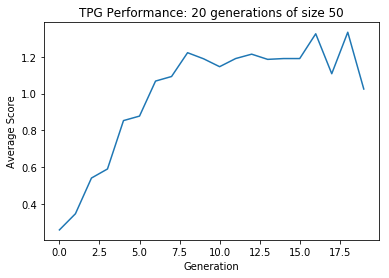

In [31]:
#We see a steady increase of score, though it remains trivially small in the end.
#I restarted the notebook and lost the RAM, but the results were still on display
#Rather than run the code for another 6 hours, I manually enter them below:
timeTaken = 21084.513924360275
summaryScores = [
    [0.0, 2.0, 0.26],
[0.0, 2.0, 0.34782608695652173],
[0.0, 3.0, 0.5416666666666666],
[0.0, 3.0, 0.5909090909090909],
[0.0, 3.0, 0.8536585365853658],
[0.0, 3.0, 0.8780487804878049],
[0.0, 4.0, 1.0681818181818181],
[0.0, 4.0, 1.0930232558139534],
[0.0, 4.0, 1.2222222222222223],
[0.0, 4.0, 1.1891891891891893],
[0.0, 4.0, 1.146341463414634],
[0.0, 3.0, 1.1904761904761905],
[0.0, 3.0, 1.2142857142857142],
[0.0, 4.0, 1.186046511627907],
[0.0, 4.0, 1.1904761904761905],
[0.0, 4.0, 1.1904761904761905],
[0.0, 3.0, 1.325],
[0.0, 4.0, 1.1081081081081081],
[0.0, 4.0, 1.3333333333333333],
[0.0, 4.0, 1.025]
]

avgs = [x[2] for x in summaryScores]
plt.plot(avgs)
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.title('TPG Performance: 20 generations of size 50')
plt.show()

#Note that copy-pasting doesn't work, giving an error message at the end of the training.
#To test hypotheses, i will use multiprogramming to speed things up. plus no render.

In [16]:
#Write some code here for environment preprocessing.

def preprocess(observation):
    #use numpy to convert each pixel to grayscale
    
    grayscale_observation = observation.mean(2)

    # Resize grayscale frame to a 47x47 matrix of 32-bit floats.
    resized_observation = misc.imresize(grayscale_observation, (47, 47)).astype(np.float32)

    return np.expand_dims(resized_observation, 2)



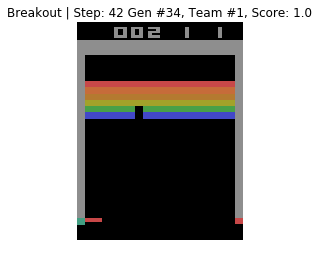

Time Taken (Seconds): 49455.051896095276
Results:
Min, Max, Avg
0.0 2.0 0.22
0.0 2.0 0.2826086956521739
0.0 2.0 0.3111111111111111
0.0 2.0 0.45652173913043476
0.0 2.0 0.6304347826086957
0.0 2.0 0.7708333333333334
0.0 2.0 0.9787234042553191
0.0 2.0 0.9545454545454546
0.0 2.0 0.9285714285714286
0.0 2.0 1.1162790697674418
0.0 2.0 0.975609756097561
0.0 2.0 1.1136363636363635
0.0 2.0 1.1627906976744187
0.0 2.0 1.1666666666666667
0.0 2.0 1.255813953488372
0.0 2.0 1.0731707317073171
0.0 2.0 1.1363636363636365
0.0 2.0 1.2142857142857142
0.0 2.0 1.2093023255813953
0.0 2.0 1.2666666666666666
0.0 2.0 1.108695652173913
0.0 2.0 1.2619047619047619
0.0 2.0 1.2127659574468086
0.0 2.0 1.288888888888889
0.0 2.0 1.1951219512195121
0.0 2.0 1.0465116279069768
0.0 2.0 1.1951219512195121
0.0 2.0 1.25
0.0 2.0 1.2857142857142858
0.0 2.0 0.9512195121951219
0.0 2.0 1.1538461538461537
0.0 3.0 1.1794871794871795
0.0 3.0 1.3409090909090908
0.0 3.0 1.2926829268292683
0.0 3.0 1.1818181818181819


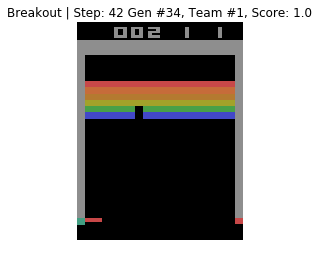

In [24]:
#I cant get MP working so try again with default
#NOTE: NP code seems to work but crashes my pc.
%matplotlib inline

#used to track time
tStart = time.time()

# first create an instance of the TpgTrainer
# this creates the whole population and everything
trainer = TpgTrainer(actions=range(4), teamPopSize=50)

curScores = [] # hold scores in a generation
pp_summaryScores = [] # record score summaries for each gen (min, max, avg)

isDone = True
#20 gens took ~6 hours. Try 35 for tonight.

for gen in range(35): # generation loop
    curScores = [] # new list per gen
    
    while True: # loop to go through agents
        teamNum = trainer.remainingAgents()
        agent = trainer.getNextAgent()
        if agent is None:
            break # no more agents, so proceed to next gen
        
        # check if agent already has score
        if agent.taskDone():
            score = agent.getOutcome()
        else:
            if isDone:
                state = preprocess(env.reset()) # get initial state and prep environment
            score = 0
            for i in range(201): # run episodes that last 200 frames
                show_state(env, i, 'Breakout', 'Gen #' + str(gen) + 
                           ', Team #' + str(teamNum) +
                           ', Score: ' + str(score)) # render env

                act = agent.act(state) # get action from agent

                # feedback from env
                state, reward, isDone, debug = env.step(act)
                score += reward # accumulate reward in score
                if isDone:
                    break # end early if losing state

            agent.reward(score) # must reward agent (if didn't already score)
            
        curScores.append(score) # store score
            
    # at end of generation, make summary of scores
    pp_summaryScores.append((min(curScores), max(curScores),
                    sum(curScores)/len(curScores))) # min, max, avg
    trainer.evolve()
    
#clear_output(wait=True)
print('Time Taken (Seconds): ' + str(time.time() - tStart))
print('Results:\nMin, Max, Avg')
for result in pp_summaryScores:
    print(result[0],result[1],result[2])

In [26]:
print(pp_summaryScores)

[(0.0, 2.0, 0.22), (0.0, 2.0, 0.2826086956521739), (0.0, 2.0, 0.3111111111111111), (0.0, 2.0, 0.45652173913043476), (0.0, 2.0, 0.6304347826086957), (0.0, 2.0, 0.7708333333333334), (0.0, 2.0, 0.9787234042553191), (0.0, 2.0, 0.9545454545454546), (0.0, 2.0, 0.9285714285714286), (0.0, 2.0, 1.1162790697674418), (0.0, 2.0, 0.975609756097561), (0.0, 2.0, 1.1136363636363635), (0.0, 2.0, 1.1627906976744187), (0.0, 2.0, 1.1666666666666667), (0.0, 2.0, 1.255813953488372), (0.0, 2.0, 1.0731707317073171), (0.0, 2.0, 1.1363636363636365), (0.0, 2.0, 1.2142857142857142), (0.0, 2.0, 1.2093023255813953), (0.0, 2.0, 1.2666666666666666), (0.0, 2.0, 1.108695652173913), (0.0, 2.0, 1.2619047619047619), (0.0, 2.0, 1.2127659574468086), (0.0, 2.0, 1.288888888888889), (0.0, 2.0, 1.1951219512195121), (0.0, 2.0, 1.0465116279069768), (0.0, 2.0, 1.1951219512195121), (0.0, 2.0, 1.25), (0.0, 2.0, 1.2857142857142858), (0.0, 2.0, 0.9512195121951219), (0.0, 2.0, 1.1538461538461537), (0.0, 3.0, 1.1794871794871795), (0.0, 

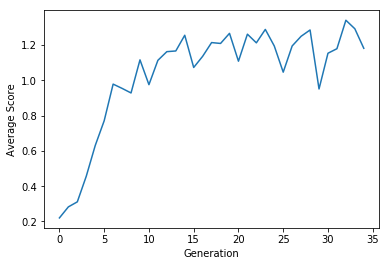

In [29]:
pp_avgs = [x[2] for x in pp_summaryScores]
plt.plot(pp_avgs)
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.show()

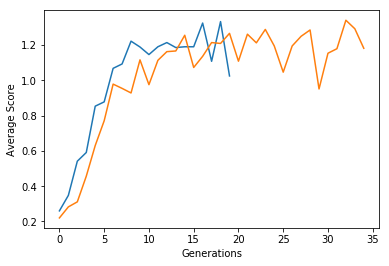

In [37]:
plt.plot(avgs)
plt.plot(pp_avgs)
plt.xlabel('Generations')
plt.ylabel('Average Score')
plt.show()